# Can the film industry be a consistent profit center?


### Header Files

In [1]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
import seaborn as sns
import string
%matplotlib inline

In [2]:
matplotlib.__version__

'3.2.1'

### Reading in the cleaned data 

In [3]:
df = pd.read_csv('group_data.csv') #our cleaned dataframe
df.drop(columns='Unnamed: 0',inplace=True) #drop index column that shouldnt be there
print(df.shape) #print shape of data frame
df.info()
df.head() #preview file

(5782, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
genres               2351 non-null object
tconst               2376 non-null object
runtime              2196 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 361.5+ KB


,id,release_date,movie,production_budget,domestic_gross,genres,tconst,runtime
0,1,2009-12-18,Avatar,425000000,760507625,Horror,tt1775309,93.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"Action,Adventure,Fantasy",tt1298650,136.0
2,3,2019-06-07,Dark Phoenix,350000000,42762350,"Action,Adventure,Sci-Fi",tt6565702,113.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,"Action,Adventure,Sci-Fi",tt2395427,141.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,NaN,NaN,NaN


#### Reading in the cleaned data summary
The cleaned CSV has been imported to begin analysis with. The data has 5782 records and 8 columns. All data types seem to match up with the dataframe except for release date column which should be in datetime.

For steps on how data was cleaned please see the  "Data Cleaning Steps Notebook".

### Investigating the data

In [4]:
df['release_date'] =  pd.to_datetime(df['release_date'], infer_datetime_format=True) #convert to datetime data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
genres               2351 non-null object
tconst               2376 non-null object
runtime              2196 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 361.5+ KB


We have now fixed the data type for the release_date column and everything looks good

In [5]:
df['domestic_gross_in_millions'] = df['domestic_gross'] / 10**6      # changing units from dollars to millions of dollars
df['profit'] = df['domestic_gross'] - df['production_budget']        # income - expense = profit
df['profit_in_millions'] = df['profit'] / 10**6                      # changing units from dollars to millions of dollars
df['year_released'] = df['release_date'].dt.year                     # creating the year_released column
df['return_on_investment'] = round(df['domestic_gross']/df['production_budget'],3) # ratio of income to money sunk in project
df['production_budget_in_millions'] = df['production_budget'] / 10**6 #changing units from dollars to millions of dollars
df.head()

,id,release_date,movie,production_budget,domestic_gross,genres,tconst,runtime,domestic_gross_in_millions,profit,profit_in_millions,year_released,return_on_investment,production_budget_in_millions
0,1,2009-12-18,Avatar,425000000,760507625,Horror,tt1775309,93.0,760.507625,335507625,335.507625,2009,1.789,425.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"Action,Adventure,Fantasy",tt1298650,136.0,241.063875,-169536125,-169.536125,2011,0.587,410.6
2,3,2019-06-07,Dark Phoenix,350000000,42762350,"Action,Adventure,Sci-Fi",tt6565702,113.0,42.762350,-307237650,-307.237650,2019,0.122,350.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,"Action,Adventure,Sci-Fi",tt2395427,141.0,459.005868,128405868,128.405868,2015,1.388,330.6
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,NaN,NaN,NaN,620.181382,303181382,303.181382,2017,1.956,317.0


#### Data Frame Manipulation

Here we begin to add rows that will be valuable information to analyze later on. The production_budget and domestic_gross numbers are quite large so it may be easier to digest these numbers in terms of millions of dollars. We also create a column with the year released so that we may begin to do some time series analysis later on.

I have also added some columns that produce profitability metrics such as profit_in_millions and return_on_investment. These are important because we want to advise our client to make smart decisions with their money. No one is in the business of losing money.

#### Filtering Data

New technology is coming out everyday. With the creation of netflix in 1997 and the increased internet speed and bandwith the way we consume film media has changed dramatically. While historical data is very important, for this business case we have decided to only go back to the year 2000. We have also decided to remove any films that were not released as of January 1, 2020 as it may not have complete data, or the film might not have been released yet.

In [6]:
df = df.loc[(df['release_date'] >= '2000-01-01') & (df['year_released'] < 2020)]  
#filtering out for the data desired as stated in our business case

### What are the profitability trends in the movie industry?

Here we will evaluate questions such as:
1. Are movies making more or less profit since 2000?
2. Are movies getting more expensive to make since 2000?
3. Does spending more money on production increase your chances of being profitable?

The intent of these questions are to provide an insight if the movie industry is thriving or failing. We want our clients to make the smartest decisions. We are looking to see if "an ounce of prevention equals a pound of cure". If we can inform our clients that entering the movie business will not only be a waste of time, but also a waste of resources not beginning down that path is the smartest choice to make.



#### Profitability Trends Question 1

Q: Are movies making more or less profit since 2000?

In [7]:
annual_totals_df = df.groupby(['year_released'])['movie'].count() #indexing by tear and adding a column with movie count

annual_totals_df = annual_totals_df.to_frame() #pandas series to dataframe to build off of

annual_totals_df.rename(columns={"movie": "movie_count"},inplace=True)

annual_totals_df['ticket_sales_in_millions'] = df.groupby(df['year_released'])['domestic_gross_in_millions'].sum().apply(lambda x: round(x,3))

annual_totals_df['production_budget_in_millions'] = df.groupby(df['year_released'])['production_budget_in_millions'].sum().apply(lambda x: round(x,3))

annual_totals_df['profit_in_millions'] = annual_totals_df['ticket_sales_in_millions'] - annual_totals_df['production_budget_in_millions']

annual_totals_df['return_on_investment_%'] = ((annual_totals_df['profit_in_millions'] / annual_totals_df['production_budget_in_millions']).apply(lambda x: x*100))


In [8]:
display(annual_totals_df)
annual_totals_df.agg(['mean','median','std'])

,movie_count,ticket_sales_in_millions,production_budget_in_millions,profit_in_millions,return_on_investment_%
year_released,,,,,
2000,189,7413.773,5890.738,1523.035,25.854740
2001,181,7909.169,5888.770,2020.399,34.309355
2002,210,8785.468,6555.038,2230.430,34.026195
2003,201,8405.310,6486.168,1919.142,29.588225
2004,206,9090.879,7268.302,1822.577,25.075692
2005,223,8347.394,7443.094,904.300,12.149517
2006,260,8679.953,7492.669,1187.284,15.845942
2007,220,8272.330,7319.501,952.829,13.017677
2008,264,9352.193,8377.547,974.646,11.634026


,movie_count,ticket_sales_in_millions,production_budget_in_millions,profit_in_millions,return_on_investment_%
mean,219.200000,9175.651400,7555.280400,1620.371000,21.060682
median,221.500000,9573.824500,7623.038000,1870.859500,23.066123
std,55.651737,1839.441252,1407.399427,861.312106,13.991807


#### Now that we have the aggregate over the years lets normalize it on a per movie basis

This will give us insight on if movies are generating more money. 

In [9]:
annual_per_movie_df = annual_totals_df

annual_per_movie_df['ticket_sales_per_movie'] = annual_totals_df['ticket_sales_in_millions'] / annual_totals_df['movie_count']

annual_per_movie_df['profit_per_movie'] = annual_totals_df['profit_in_millions'] / annual_totals_df['movie_count']

annual_per_movie_df['production_budget_per_movie'] = annual_totals_df['production_budget_in_millions'] / annual_totals_df['movie_count']

annual_per_movie_df['roi_per_movie'] = annual_totals_df['return_on_investment_%'] / annual_totals_df['movie_count']

annual_per_movie_df = annual_per_movie_df.reset_index()

In [10]:
annual_per_movie_df.head()

,year_released,movie_count,ticket_sales_in_millions,production_budget_in_millions,profit_in_millions,return_on_investment_%,ticket_sales_per_movie,profit_per_movie,production_budget_per_movie,roi_per_movie
0,2000,189,7413.773,5890.738,1523.035,25.854740,39.226312,8.058386,31.167926,0.136798
1,2001,181,7909.169,5888.770,2020.399,34.309355,43.697066,11.162425,32.534641,0.189554
2,2002,210,8785.468,6555.038,2230.430,34.026195,41.835562,10.621095,31.214467,0.162029
3,2003,201,8405.310,6486.168,1919.142,29.588225,41.817463,9.547970,32.269493,0.147205
4,2004,206,9090.879,7268.302,1822.577,25.075692,44.130481,8.847461,35.283019,0.121727


In [11]:
annual_per_movie_df.drop(columns=['movie_count','ticket_sales_in_millions','production_budget_in_millions','profit_in_millions','return_on_investment_%','roi_per_movie'], inplace=True)


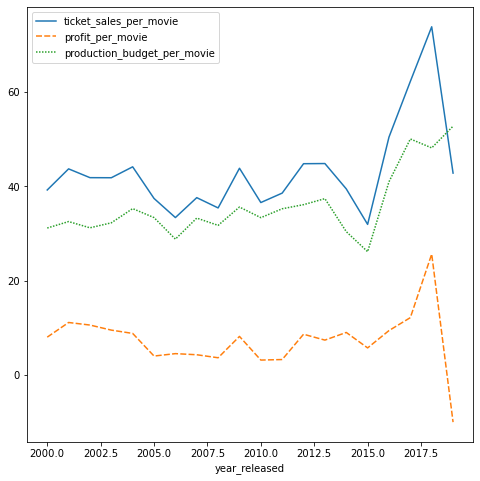

In [12]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=annual_per_movie_df.set_index(['year_released']))

C:\Users\blake\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


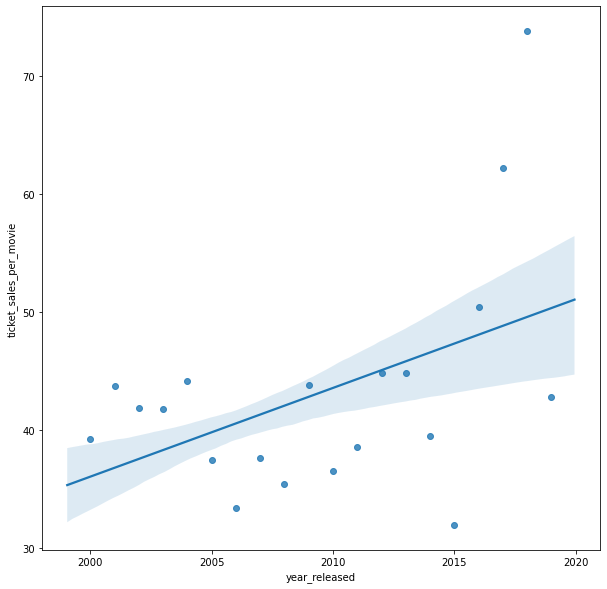

In [13]:
plt.figure(figsize=(10,10))
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['ticket_sales_per_movie'],ci=67)

C:\Users\blake\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


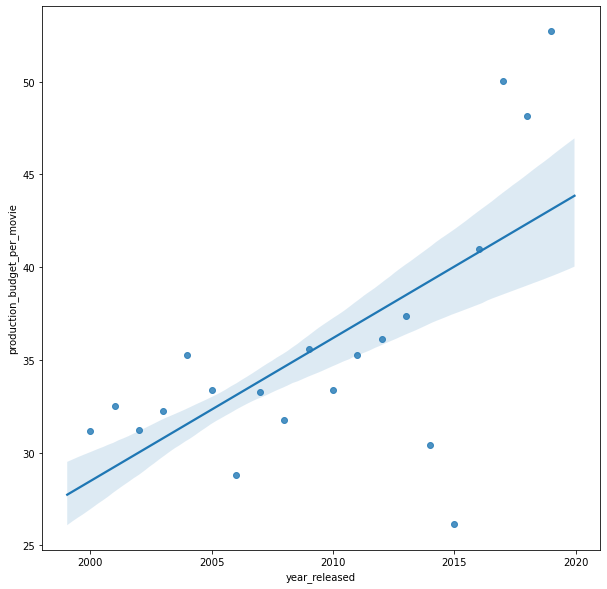

In [14]:
plt.figure(figsize=(10,10))
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['production_budget_per_movie'],ci=67)

C:\Users\blake\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


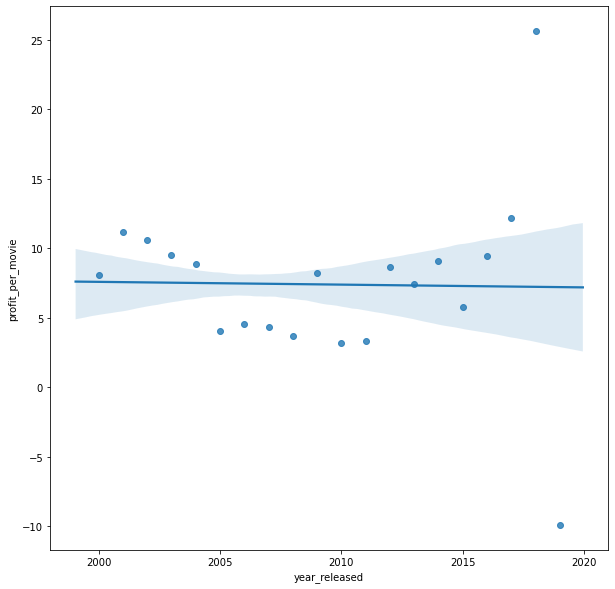

In [15]:
plt.figure(figsize=(10,10))
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['profit_per_movie'],ci=67)

In [16]:
plt.figure(figsize=(10,10))
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['roi_per_movie'],ci=67)

KeyError: 'roi_per_movie'

<Figure size 720x720 with 0 Axes>

In [ ]:
annual_per_movie_df.head()

#### Correlations

In [ ]:
corrMatrix = annual_per_movie_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, annot=True)

In [ ]:
df_master_correlations = df.drop(columns=['genres','tconst','domestic_gross','profit','production_budget','id'])
display(df_master_correlations.head())
corrMatrix = df_master_correlations.corr()
sns.heatmap(corrMatrix, annot=True)

### Range of Outcomes

In [ ]:
plt.figure(figsize=(13, 8))
sns.boxplot(df['profit_in_millions'],df['year_released'], showfliers=False, orient='h', palette='muted')
plt.show()

In [ ]:
profit_metrics = df.groupby(['year_released'])[['profit_in_millions','production_budget_in_millions',
                               'return_on_investment']].agg(['median','mean','std'])

In [ ]:
profit_trend_plot = sns.lineplot(data = profit_metrics['profit_in_millions'])


In [ ]:
plt.figure(figsize=(13, 8))
roi_trend_plot = sns.lineplot(data = profit_metrics['return_on_investment'])

In [ ]:
plt.figure(figsize=(13, 8))
roi_trend_plot = sns.lineplot(data = profit_metrics['production_budget_in_millions'])

In [ ]:
df.head()

In [ ]:
plt.scatter(df['year_released'],df['domestic_gross'])
plt.yscale('log')
plt.show()

In [ ]:
df['production_budget'].corr(df['profit']) #0.1368
df['production_budget'].corr(df['domestic_gross']) #0.7322
df['production_budget'].corr(df['runtime']) #.311

In [ ]:
plt.hist(df['domestic_gross_in_millions'])
average_domestic_gross_alltime = round(df['domestic_gross_in_millions'].mean(),3)
median_domestic_gross_alltime = df['domestic_gross_in_millions'].median()



print(f'The average ticket sales revenue is {average_domestic_gross_alltime} million dollars')
print(f'The median ticket sales revenue is {median_domestic_gross_alltime} median dollars')

average_production_budget_alltime = round(df['production_budget_in_millions'].mean(),3)
median_domestic_gross_alltime = df['production_budget_in_millions'].median()

print(f'The average production budget is {average_production_budget_alltime} million dollars')
print(f'The median production budget is {median_domestic_gross_alltime} median dollars')

In [ ]:
sns.regplot(df['year_released'],df['domestic_gross_in_millions'])


In [ ]:
df['domestic_gross_in_millions'].describe()

In [ ]:
plt.figure(figsize=(13, 8))
sns.boxplot(df['profit_in_millions'],df['year_released'], showfliers=False, orient='h', palette='muted')
plt.show()